# [Matplotlib+ Seaborn + Pandas: An Ideal Amalgamation for Statistical Data Visualisation](https://towardsdatascience.com/matplotlib-seaborn-pandas-an-ideal-amalgamation-for-statistical-data-visualisation-f619c8e8baa3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips=sns.load_dataset("tips")
iris=sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let us try to understand Figure and Axes class with an example

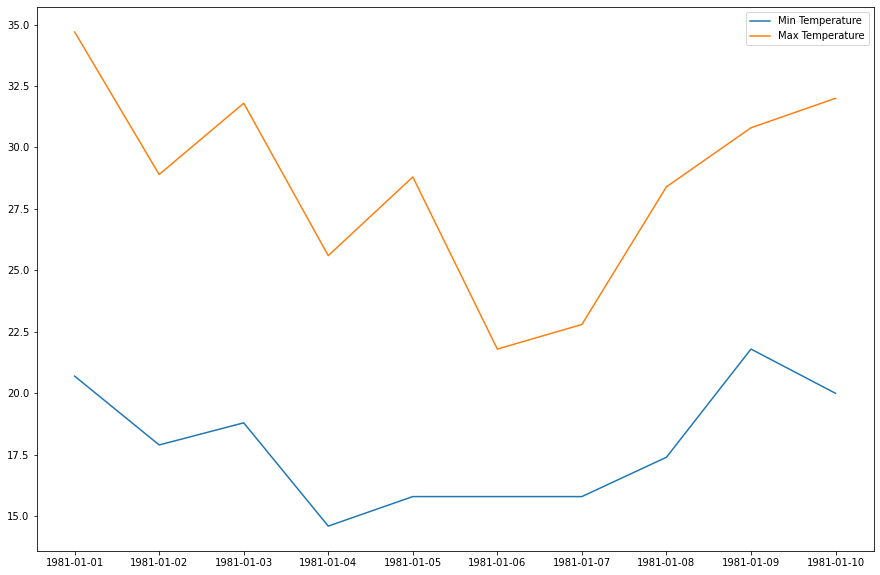

In [5]:
dates = [
    '1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04', '1981-01-05',
    '1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09', '1981-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 
                   17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 
                   28.4, 30.8, 32.0]

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label = 'Max Temperature')
axes.legend()

`plt.subplots()` creates a single Figure instance, (nrows * ncols) Axes instances and returns the created Figure and Axes instances . In the above example, since we have passed `nrows`=1 and `ncols`=1, it creates only a single Axes instance. If `nrows` > 1 or `ncols` > 1, it creates a grid of Axes and returns them in an (nrows, ncols) shaped numpy array.

Most frequently used methods of Axes class for customisation are
```python
Axes.set_xlabel()         Axes.set_ylabel()
Axes.set_xlim()           Axes.set_ylim()
Axes.set_xticks()         Axes.set_yticks()
Axes.set_xticklabels()    Axes.set_yticklabels()
Axes.set_title()
Axes.tick_params()
```
Here is an example which uses some of the above methods to make some customisation

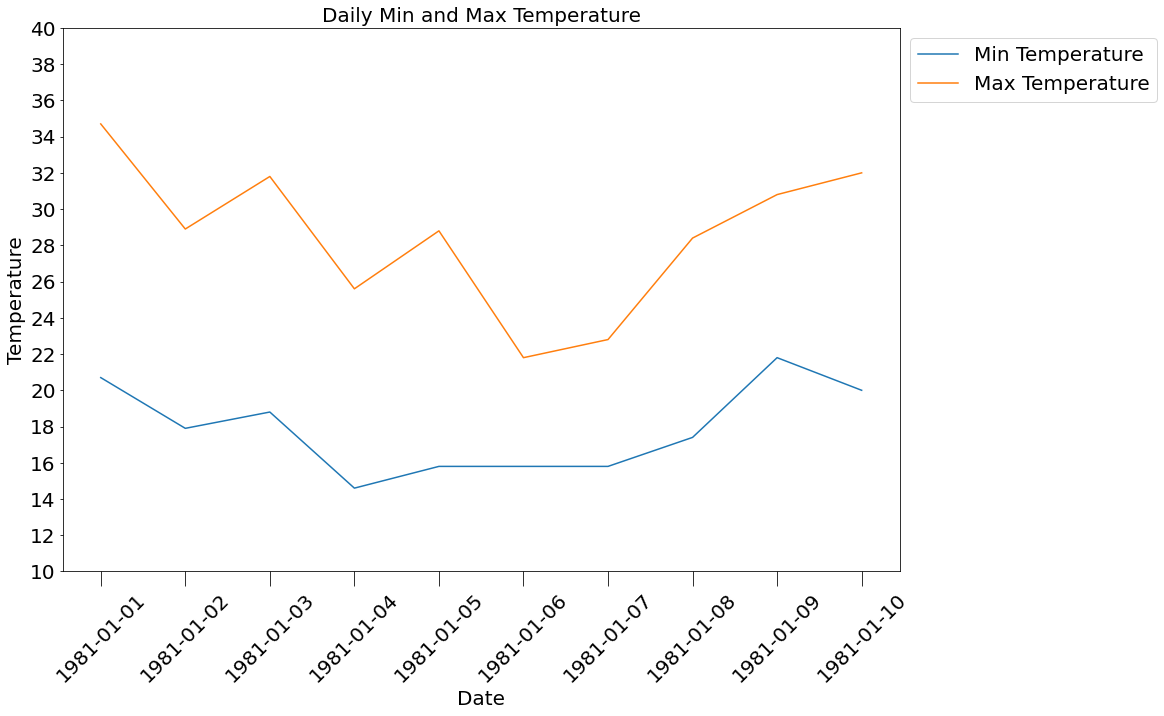

In [6]:
fontsize =20
fig,axes = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
axes.plot(dates, min_temperature, label='Min Temperature')
axes.plot(dates, max_temperature, label='Max Temperature')

axes.set_xlabel('Date',fontsize=fontsize)
axes.set_ylabel('Temperature',fontsize=fontsize)

axes.set_title('Daily Min and Max Temperature',fontsize=fontsize)

axes.set_xticks(dates)
axes.set_xticklabels(dates)
axes.tick_params('x', labelsize=fontsize, labelrotation=45, size=15)


axes.set_ylim(10,40)
axes.set_yticks(np.arange(10,41,2))
axes.tick_params('y',labelsize=fontsize)

axes.legend(fontsize=fontsize,loc='upper left', bbox_to_anchor=(1,1))

Now that we have reviewed the basics of matplotlib, lets move on to seaborn

### 2. Seaborn
Each plotting function in seaborn is either a **figure-level** function or an **Axes-level** function, and it is essential to understand the difference between the two. As mentioned earlier, a Figure refers to the whole figure that you see, where as an Axes refers to a specific subplot in the figure. An **Axes-level** function draws onto a single matplotlib Axes and does not effect the rest of the figure. A **figure-level** function, on the other hand, controls the entire figure. One way to think about this is, a **figure-level** function can call different **Axes-level** functions to draw different types of subplots on different Axes

### 2.1 Axes Level Functions
Here is an exhaustive list of all Axes-level functions in seaborn

```python
 Relational Plots
  scatterplot()
  lineplot()
Categorical Plots
  striplot()    swarmplot()
  boxplot()     boxenplot()
  violinplot()  countplot()
  pointplot()   barplot()
Distribution Plots
  histplot()
  kdeplot()
  rugplot()
Regression Plots
  regplot()
  residplot()
MatrixPlots()
  heatmap()
```

There are two main things to understand to use any **Axes-level** function
1. Different ways to give input data to the Axes-level function.
2. Specifying the Axes to be used to make the plot.

### 2.1.1 Different Ways to give input data to the Axes-level function
There are three different ways to pass data to Axes-level function
1. Lists, Arrays or Series

The most common way to pass data to an **Axes-level** function is using iterables like lists, arrays or serie

<AxesSubplot:>

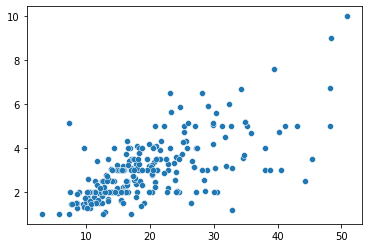

In [7]:
total_bill=tips.total_bill.values
tip=tips.tip.values
sns.scatterplot(x=total_bill, y=tip)

2. Using pandas Dataframe and names of columns.
One of the main reasons for seaborn’s popularity, is its ability to directly work with pandas Dataframes. In this method for passing data, column names should be passed to `x` and `y` parameters and Dataframe should be passed to `data` parameter

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

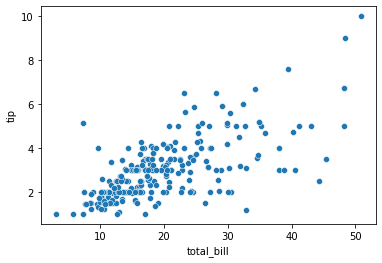

In [8]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

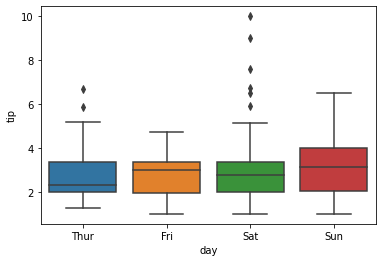

In [9]:
sns.boxplot(x="day", y="tip", data=tips)

3. Passing only the Dataframe
In this method for passing data, only the Dataframe is passed to data parameter. Each numeric column in the dataset will be plotted using this method. This method can be used only with following Axes-level functions
```python
stripplot()  swarmplot()
boxplot()    boxenplot()  violinplot()  pointplot()
barplot()    countplot().
```

A specific use case for this method of passing input data is comparing the distribution of multiple numeric variables in a dataset, using any of the above mentioned Axes-level functions

<AxesSubplot:>

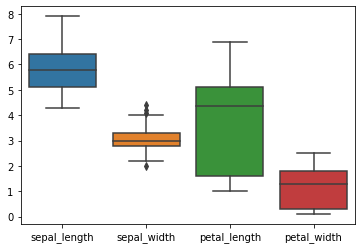

In [10]:
sns.boxplot(data=iris)